# ✈️Data Scientist Challenge - LATAM Airlines

### **Manuel David Alcantara - IBM** 

* manuel.alcantara@pe.ibm.com
* https://www.linkedin.com/in/manuel-david-alcantara/

--------------------------------

Desafío

1. [¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?](#p1)
2. [Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv](#p2)
3. [¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?](#p3)
4. [Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo](#p4)
5. [Evalúa tu modelo](#p5)

------------------------------

## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

    Fecha-I : Fecha y hora programada del vuelo.
    Vlo-I : Número de vuelo programado.
    Ori-I : Código de ciudad de origen programado.
    Des-I : Código de ciudad de destino programado.
    Emp-I : Código aerolínea de vuelo programado.
    Fecha-O : Fecha y hora de operación del vuelo.
    Vlo-O : Número de vuelo de operación del vuelo.
    Ori-O : Código de ciudad de origen de operación
    Des-O : Código de ciudad de destino de operación.
    Emp-O : Código aerolínea de vuelo operado.
    DIA : Día del mes de operación del vuelo.
    MES : Número de mes de operación del vuelo.
    AÑO : Año de operación del vuelo.
    DIANOM : Día de la semana de operación del vuelo.
    TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
    OPERA : Nombre de aerolínea que opera.
    SIGLAORI : Nombre ciudad origen.
    SIGLADES : Nombre ciudad destino.

------------------------------------

### - Carga de datos y librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_SCL.csv', index_col=False, dtype='unicode')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
df.shape

(68206, 18)

In [4]:
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA          object
MES          object
AÑO          object
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [5]:
# using dictionary to convert specific columns
df['Fecha-I']= pd.to_datetime(df['Fecha-I'])
df['Fecha-O']= pd.to_datetime(df['Fecha-O'])
convert_dict = {'DIA': int,
                'MES': int,
                'AÑO': int,
                }
df = df.astype(convert_dict)
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int32
MES                   int32
AÑO                   int32
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [6]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


------------------

## Desafío

### 1. ¿Cómo se distribuyen los datos? <a id="p1"></a>

A continuación, se grafica la distribución de los datos.

### ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Todos los 68,206 registros del dataset original indican:
* Ori-I = SCEL: Aeropuerto Internacional Arturo Merino Benítez, Santiago de Chile
* Ori-O = SCEL: Aeropuerto Internacional Arturo Merino Benítez, Santiago de Chile

In [7]:
for col in df.columns:
    print(col, df[col].nunique())

Fecha-I 53252
Vlo-I 584
Ori-I 1
Des-I 64
Emp-I 30
Fecha-O 62774
Vlo-O 861
Ori-O 1
Des-O 63
Emp-O 32
DIA 31
MES 12
AÑO 2
DIANOM 7
TIPOVUELO 2
OPERA 23
SIGLAORI 1
SIGLADES 62


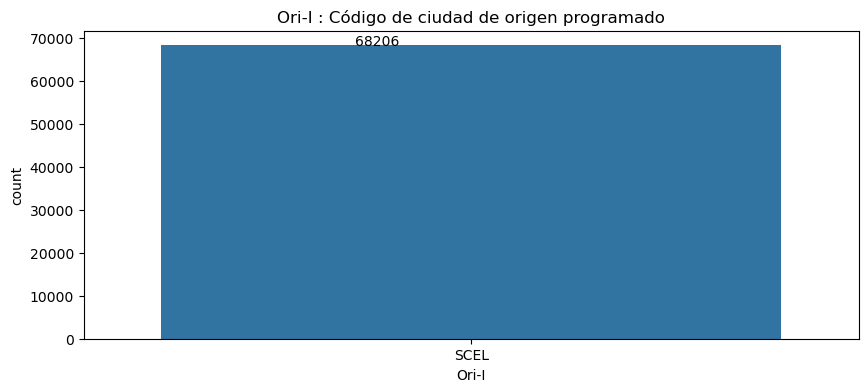

In [8]:
#Ori-I : Código de ciudad de origen programado.

plt.figure(figsize=(10,4))
ax = sns.countplot(x='Ori-I', data=df)
plt.title("Ori-I : Código de ciudad de origen programado")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#SCEL: Aeropuerto Internacional Arturo Merino Benítez, Santiago de Chile

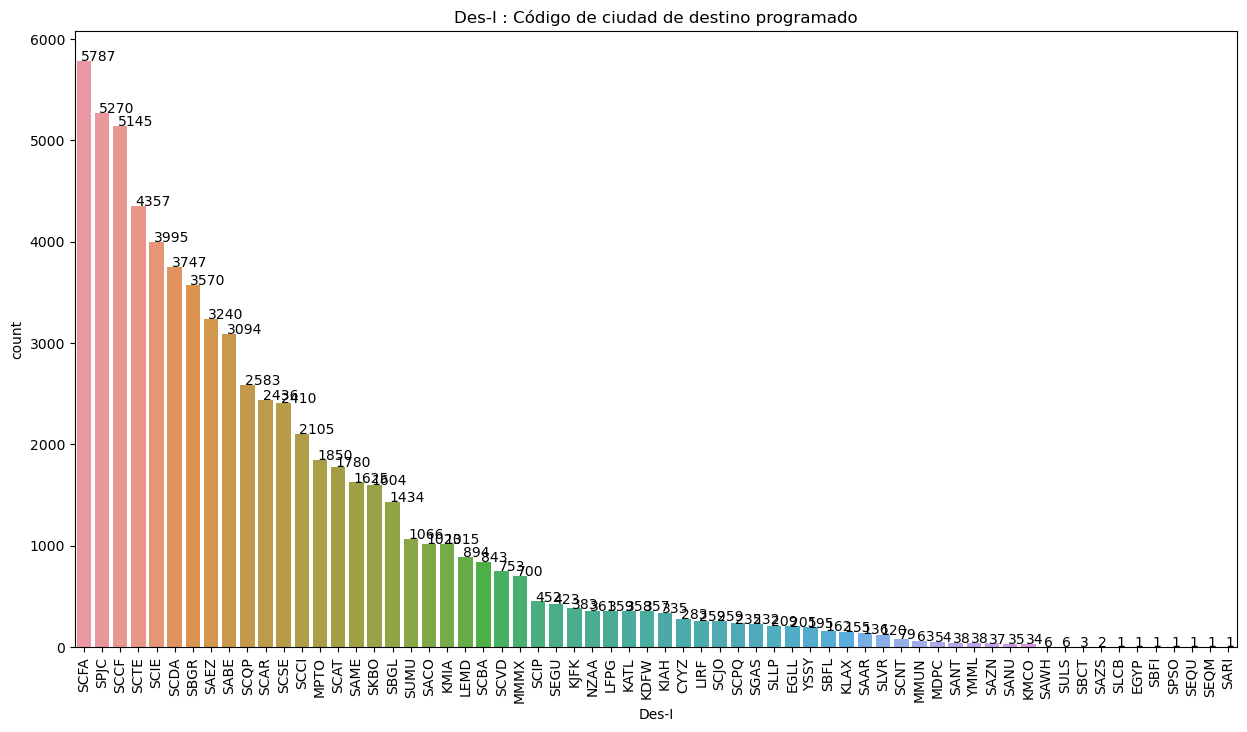

In [9]:
#Des-I : Código de ciudad de destino programado.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='Des-I', data=df, order = df['Des-I'].value_counts().index)
plt.title("Des-I : Código de ciudad de destino programado")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

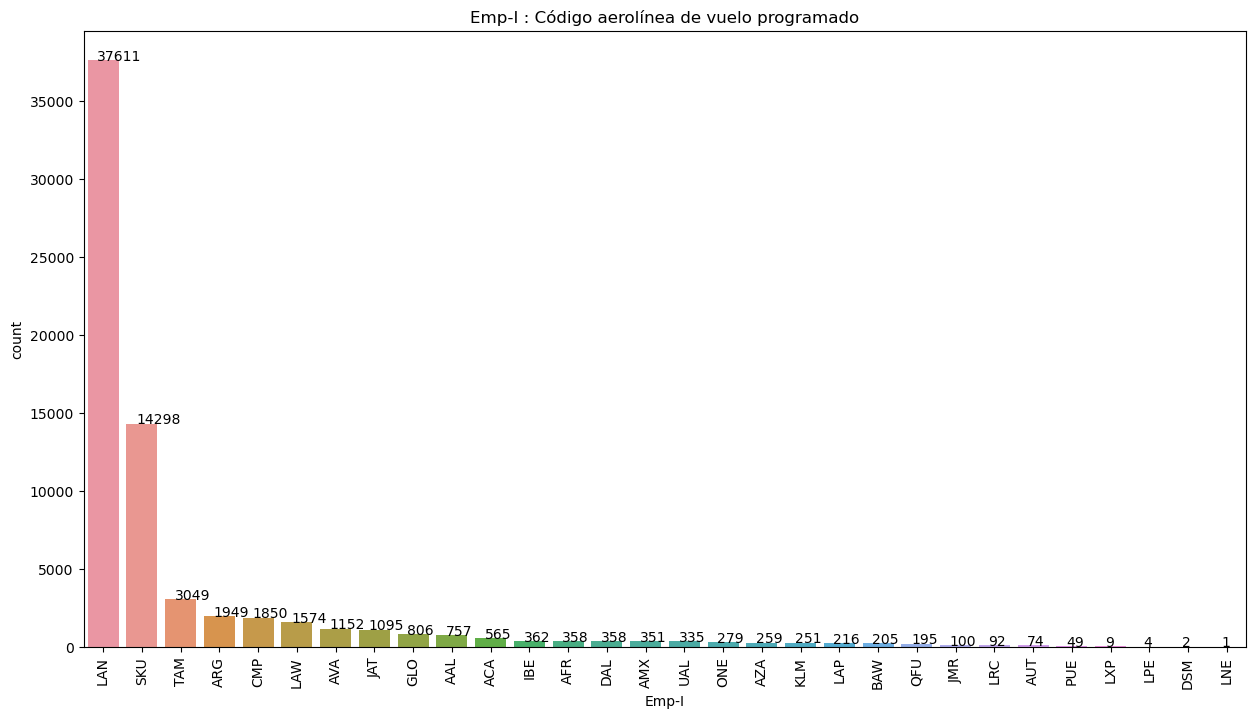

In [10]:
# Emp-I : Código aerolínea de vuelo programado.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='Emp-I', data=df, order = df['Emp-I'].value_counts().index)
plt.title("Emp-I : Código aerolínea de vuelo programado")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

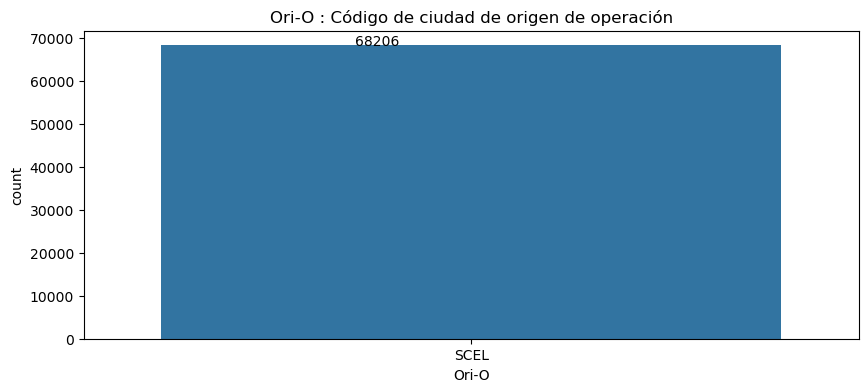

In [11]:
# Ori-O : Código de ciudad de origen de operación

plt.figure(figsize=(10,4))
ax = sns.countplot(x='Ori-O', data=df)
plt.title("Ori-O : Código de ciudad de origen de operación")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#SCEL: Aeropuerto Internacional Arturo Merino Benítez, Santiago de Chile

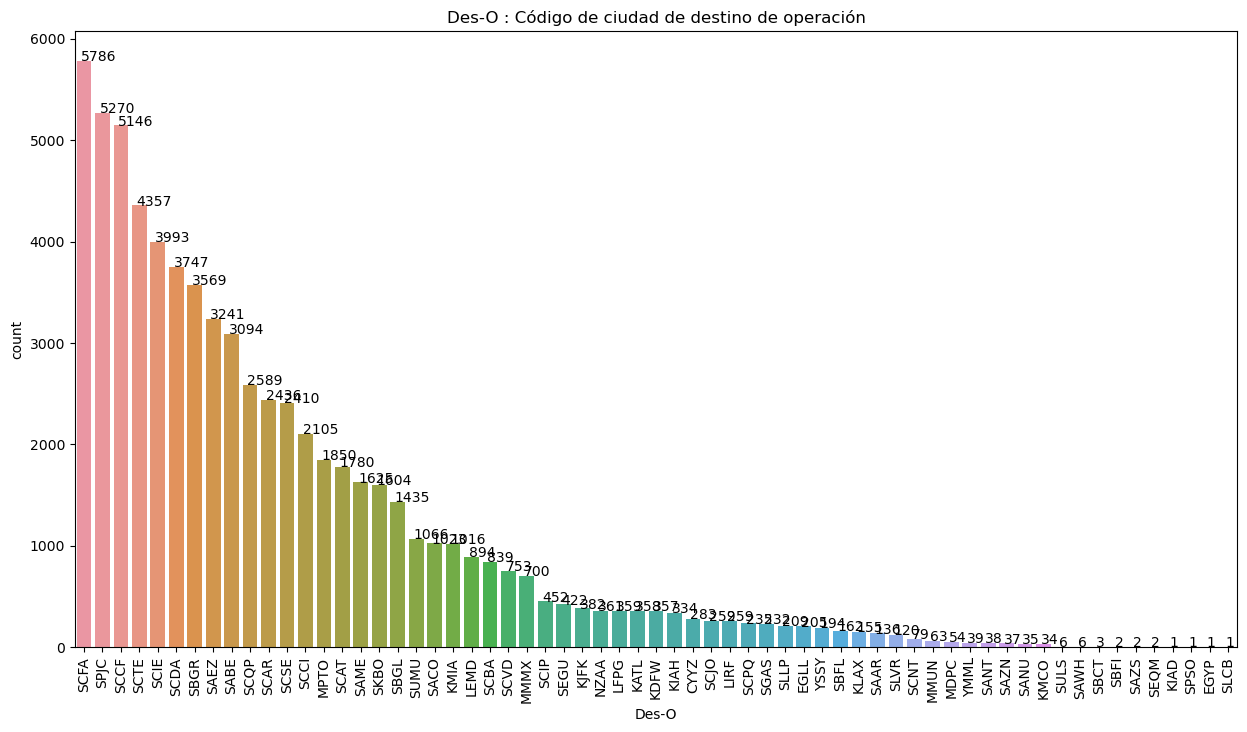

In [12]:
# Des-O : Código de ciudad de destino de operación.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='Des-O', data=df, order = df['Des-O'].value_counts().index)
plt.title("Des-O : Código de ciudad de destino de operación")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

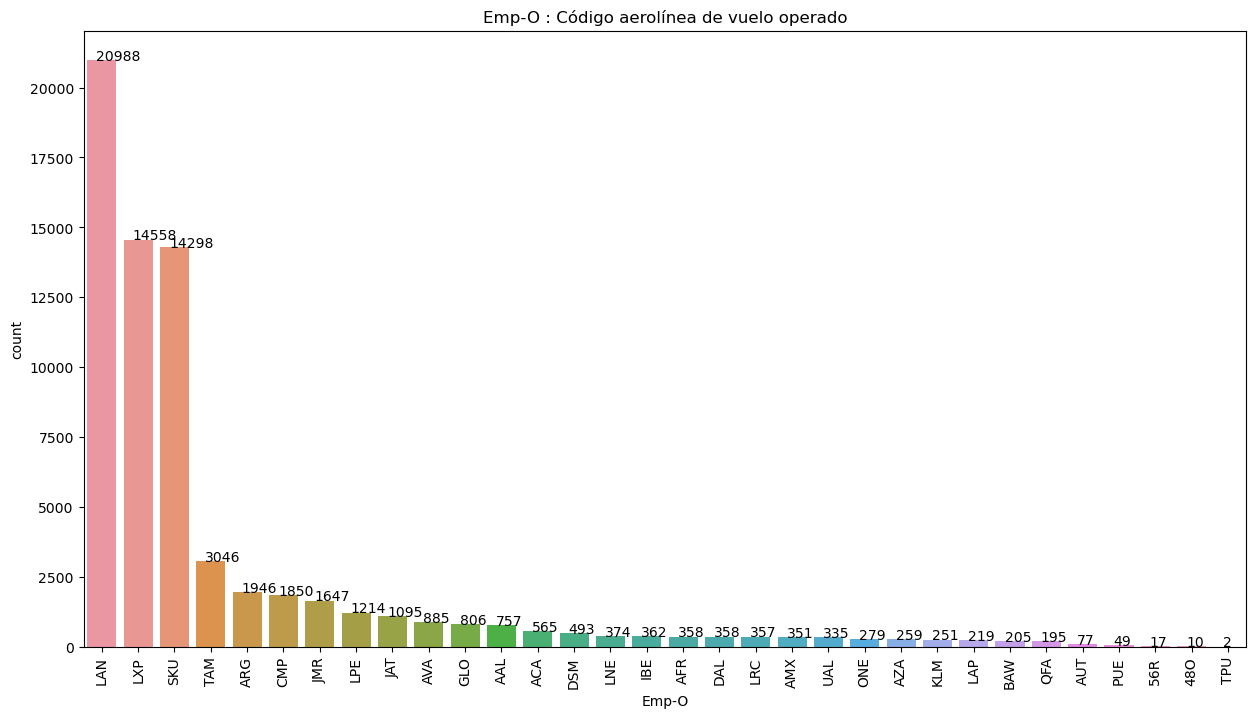

In [13]:
# Emp-O : Código aerolínea de vuelo operado.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='Emp-O', data=df, order = df['Emp-O'].value_counts().index)
plt.title("Emp-O : Código aerolínea de vuelo operado")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

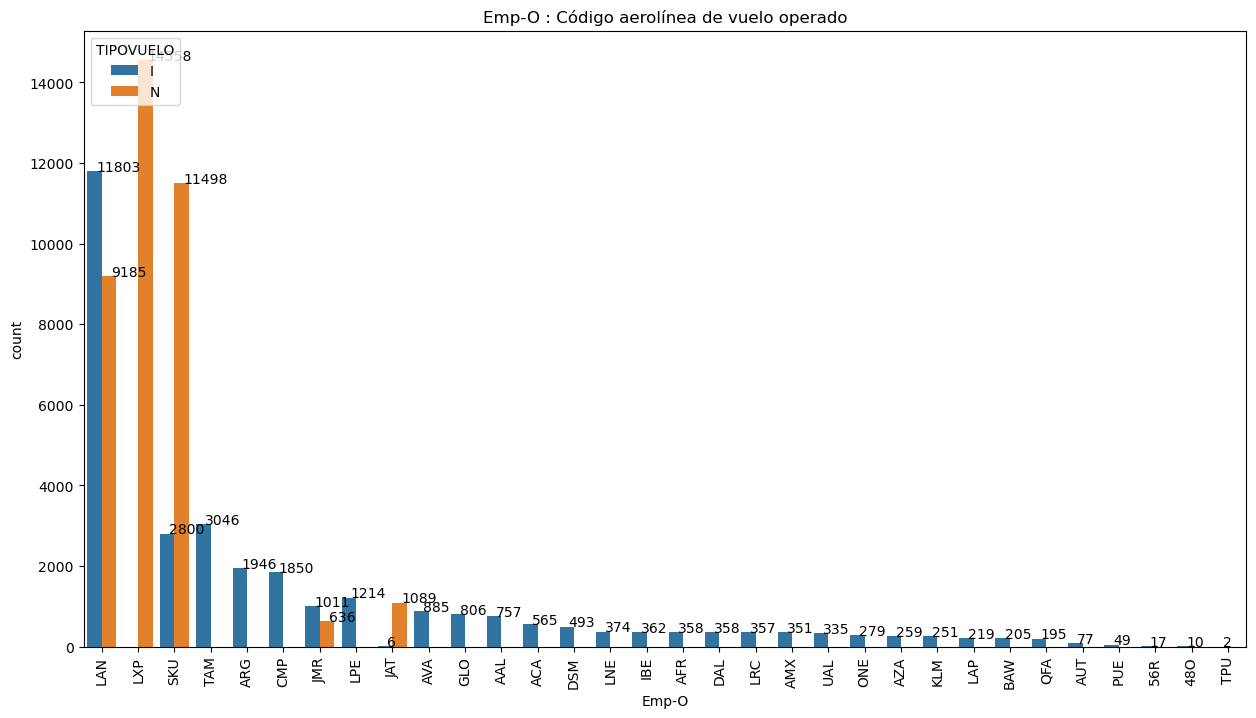

In [14]:
# Emp-O : Código aerolínea de vuelo operado.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='Emp-O', data=df, hue="TIPOVUELO", order = df['Emp-O'].value_counts().index)
plt.title("Emp-O : Código aerolínea de vuelo operado")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

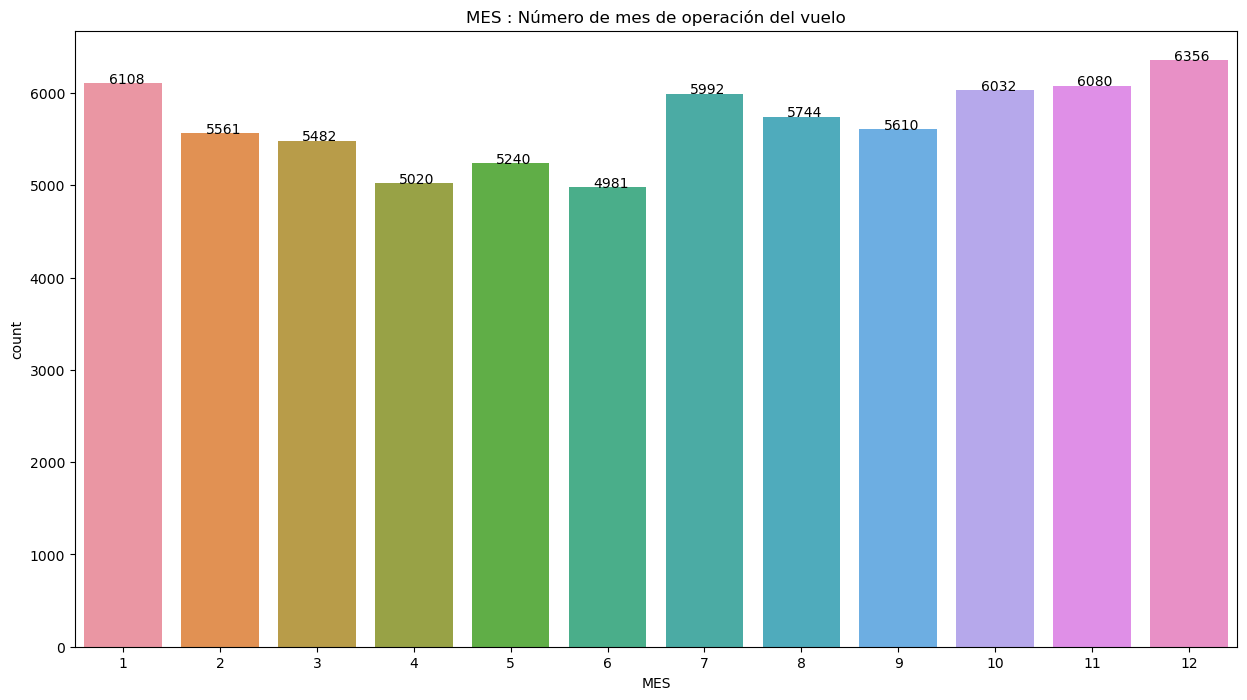

In [15]:
# MES : Número de mes de operación del vuelo.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='MES', data=df)
plt.title("MES : Número de mes de operación del vuelo")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

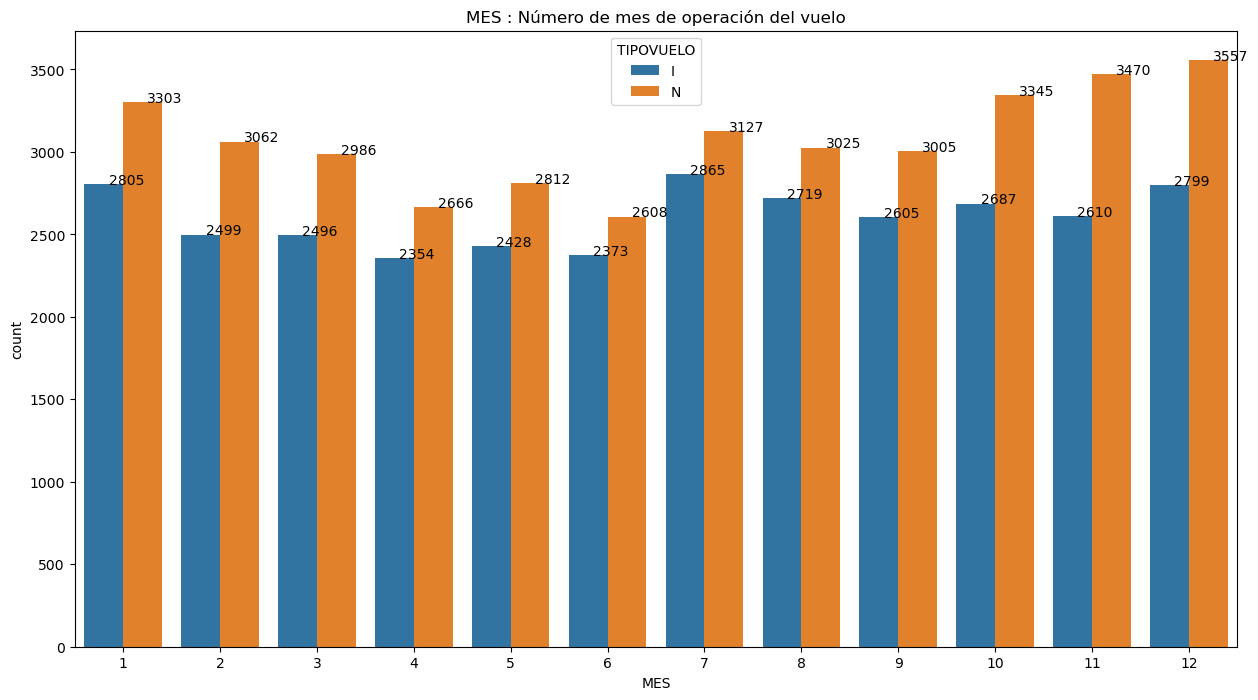

In [16]:
# MES : Número de mes de operación del vuelo.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='MES', hue="TIPOVUELO", data=df)
plt.title("MES : Número de mes de operación del vuelo")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

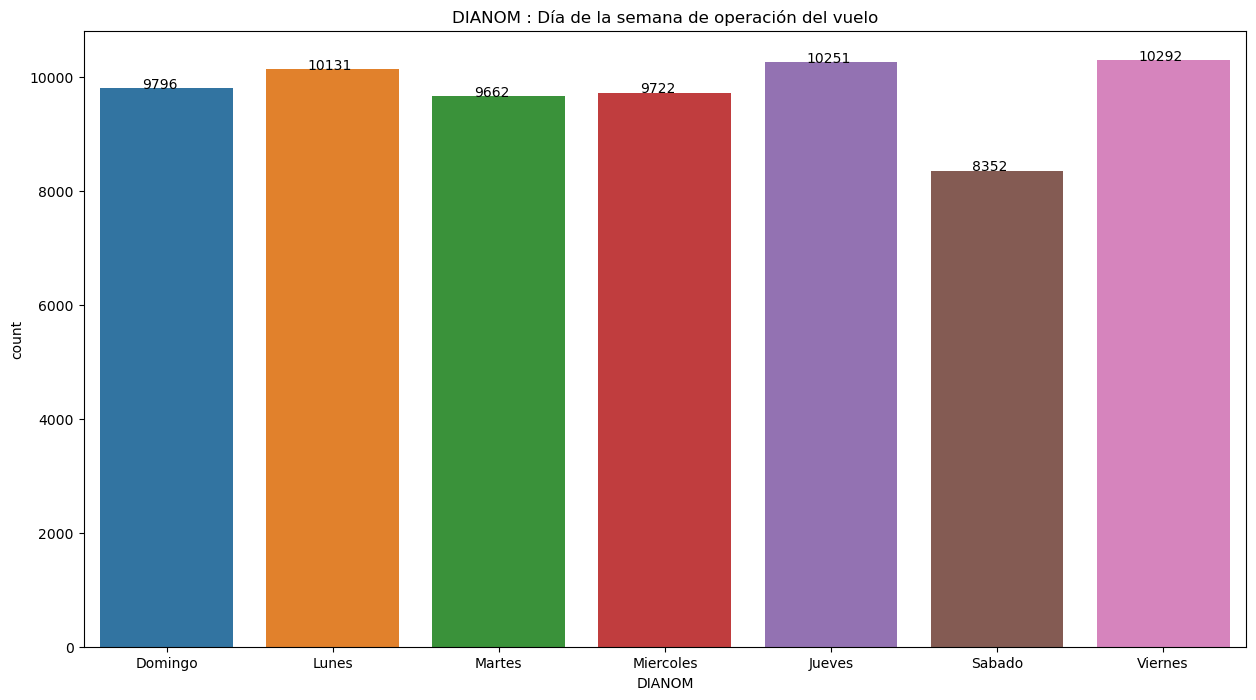

In [17]:
# DIANOM : Día de la semana de operación del vuelo.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='DIANOM', data=df)
plt.title("DIANOM : Día de la semana de operación del vuelo")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

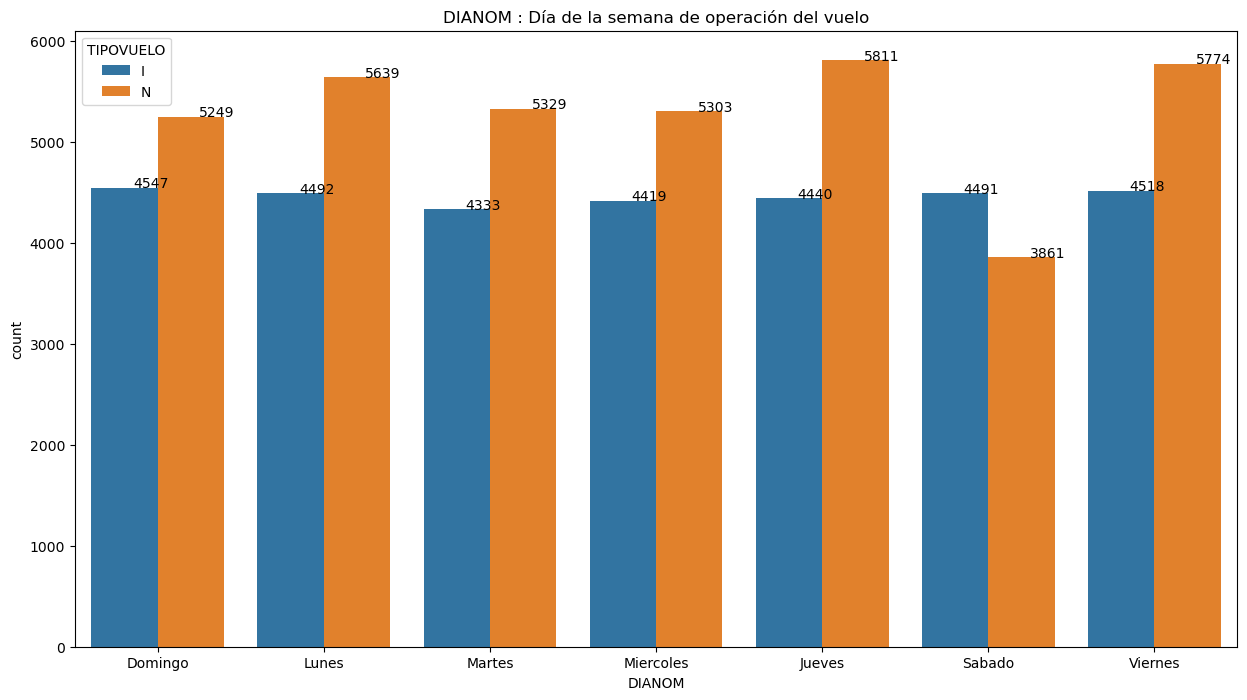

In [18]:
# DIANOM : Día de la semana de operación del vuelo.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='DIANOM', hue="TIPOVUELO", data=df)
plt.title("DIANOM : Día de la semana de operación del vuelo")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

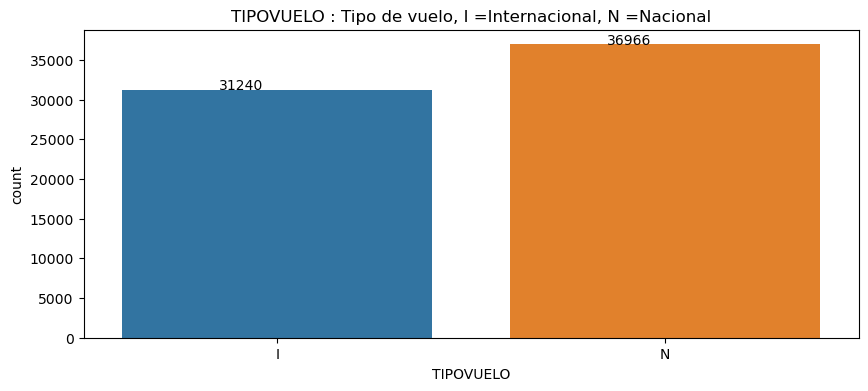

In [19]:
# TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.

plt.figure(figsize=(10,4))
ax = sns.countplot(x='TIPOVUELO', data=df)
plt.title("TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

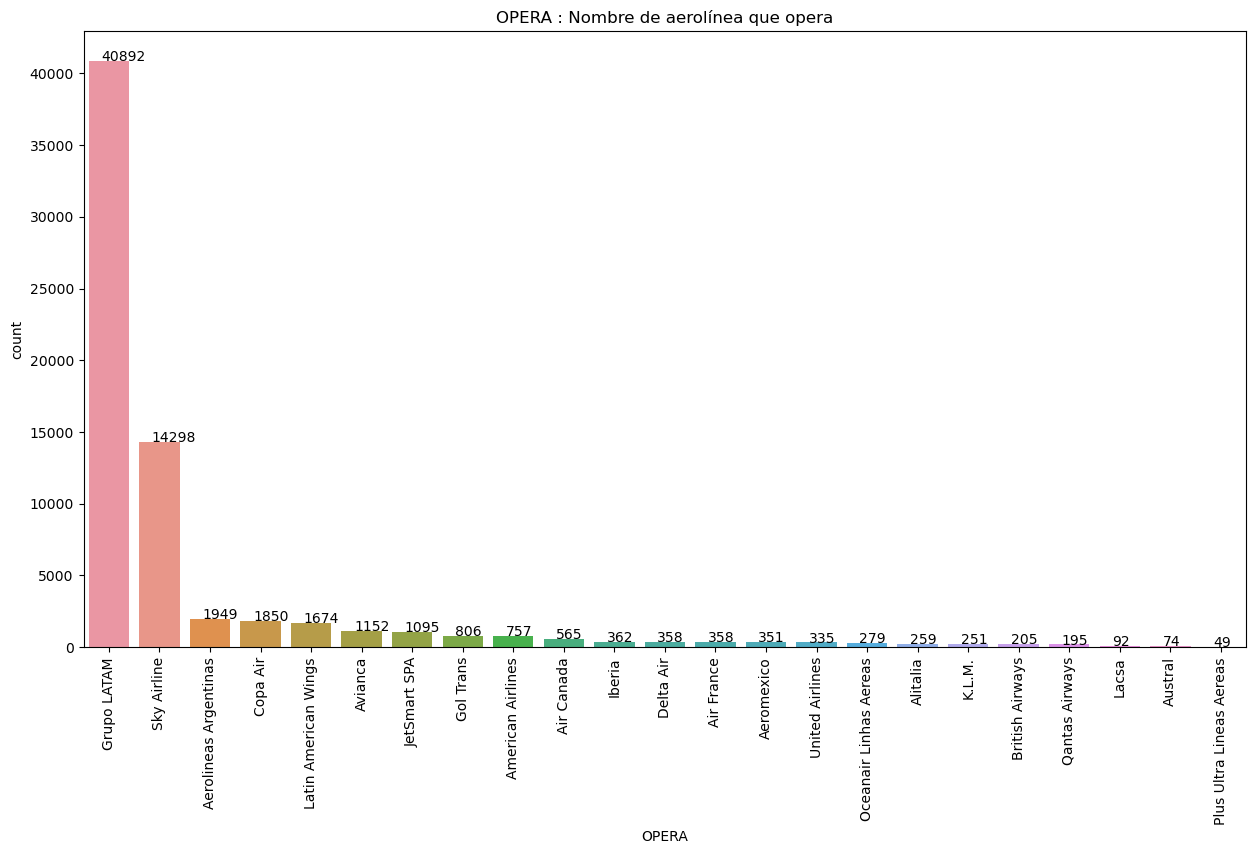

In [20]:
# OPERA : Nombre de aerolínea que opera.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='OPERA', data=df, order = df['OPERA'].value_counts().index)
plt.title("OPERA : Nombre de aerolínea que opera")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

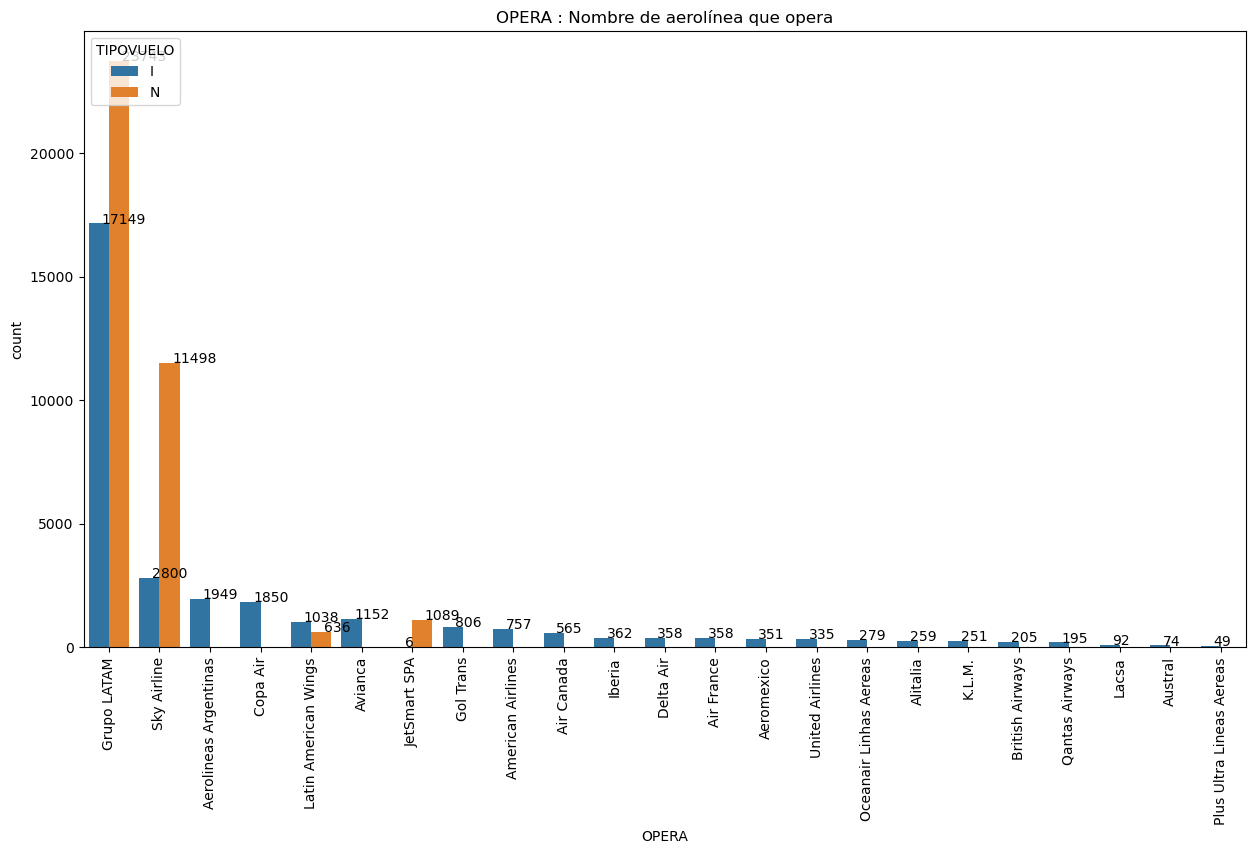

In [21]:
# OPERA : Nombre de aerolínea que opera.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='OPERA', hue='TIPOVUELO', data=df, order = df['OPERA'].value_counts().index)
plt.title("OPERA : Nombre de aerolínea que opera")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

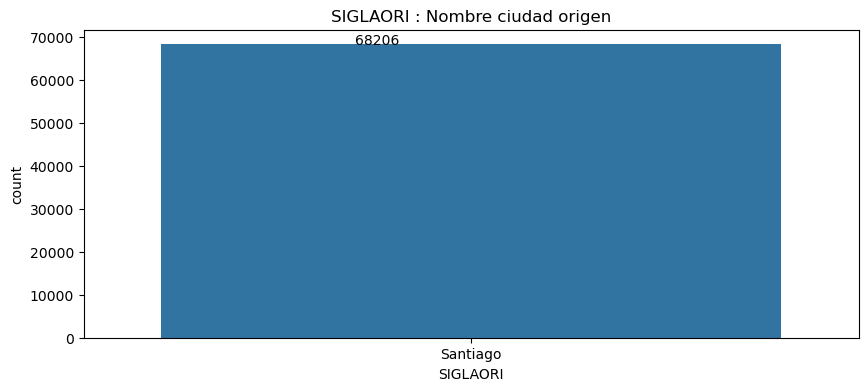

In [22]:
# SIGLAORI : Nombre ciudad origen.

plt.figure(figsize=(10,4))
ax = sns.countplot(x='SIGLAORI', data=df)
plt.title("SIGLAORI : Nombre ciudad origen")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

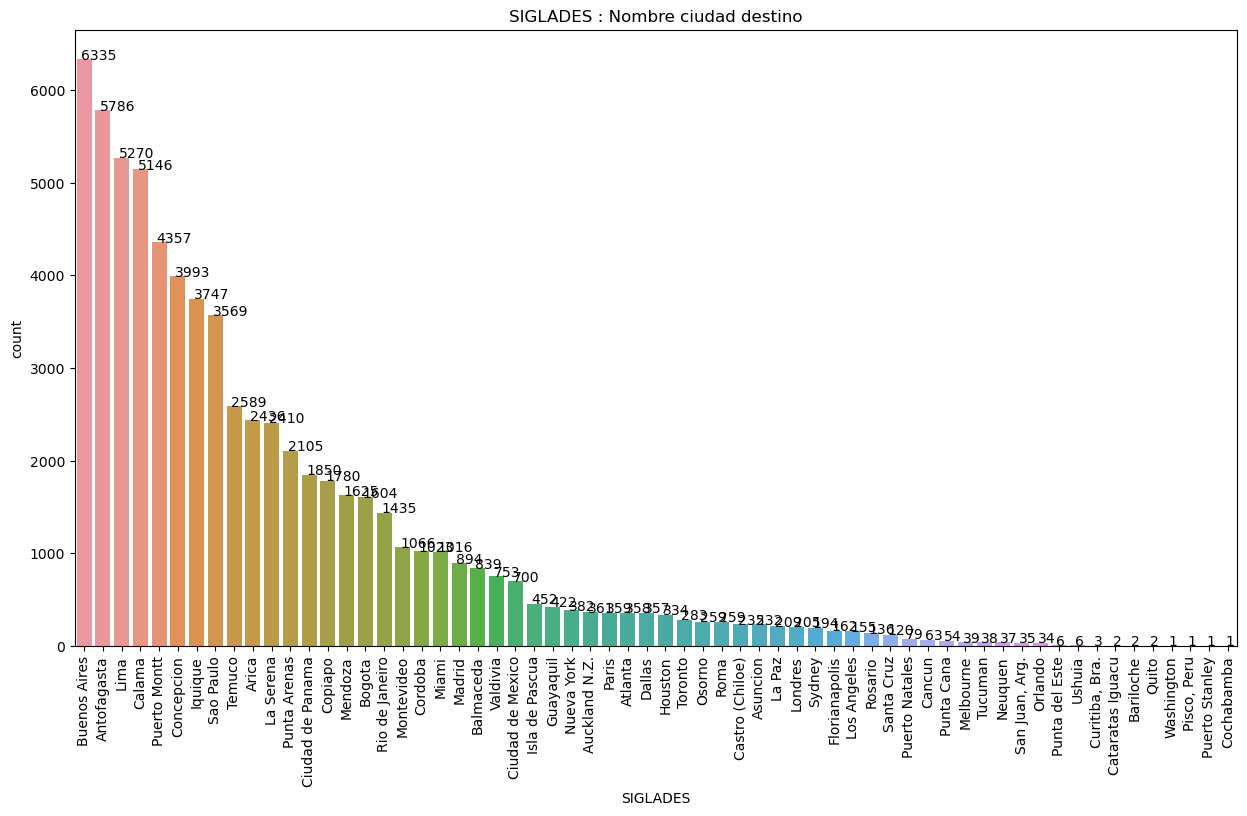

In [23]:
# SIGLADES : Nombre ciudad destino.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='SIGLADES', data=df, order = df['SIGLADES'].value_counts().index)
plt.title("SIGLADES : Nombre ciudad destino")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

-----------------------------------------

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :  <a id="p2"></a>


|     Columna    |                                                  Detalle                                                 |
|:--------------:|:--------------------------------------------------------------------------------------------------------:|
| temporada_alta | 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no                    |
|     dif_min    | diferencia en minutos entre Fecha-O y Fecha-I                                                            |
|    atraso_15   | 1 si dif_min > 15, 0 si no                                                                               |
|   periodo_dia  | mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I |

Se generan las columnas adicionales:

In [24]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


#### a. temporada_alta	

In [25]:
df['temporada_alta'] = 0
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,0
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,0
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,0
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,0


* Validamos si existen registros donde 'Fecha-O' sea diferente al año 2017 

In [26]:
for index, row in df.iterrows():
    if(row['Fecha-O'].year != 2017):
        print(index, row['Fecha-O'], "- Año diferente al 2017")

66918 2018-01-01 00:02:00 - Año diferente al 2017
66947 2018-01-01 00:12:00 - Año diferente al 2017


* Debido a que existen registros fuera de un mismo año (2017), los rangos de "temporada_alta" para Fecha-I deben ser reorganizados:

        15-Dic y 3-Mar = (15-Dic y 31-Dic) || (1-Ene y 3-Mar)
        15-Jul y 31-Jul
        11-Sep y 30-Sep

In [27]:
# temporada_alta:
# 1-Ene y 3-Mar
# 15-Jul y 31-Jul
# 11-Sep y 30-Sep
# 15-Dic y 31-Dic

for index, row in df.iterrows():
    if ((row['Fecha-I'] >= pd.Timestamp(2017, 1, 1)) and (row['Fecha-I'] <= pd.Timestamp(2017, 3, 1)) or\
        (row['Fecha-I'] >= pd.Timestamp(2017, 7, 15)) and (row['Fecha-I'] <= pd.Timestamp(2017, 7, 31)) or\
        (row['Fecha-I'] >= pd.Timestamp(2017, 9, 11)) and (row['Fecha-I'] <= pd.Timestamp(2017, 9, 30)) or\
        (row['Fecha-I'] >= pd.Timestamp(2017, 12, 15)) and (row['Fecha-I'] <= pd.Timestamp(2017, 12, 31))
       ):
        df.loc[index, 'temporada_alta'] = 1
        #print(row['Fecha-I'])

In [28]:
df1 = df.loc[df['temporada_alta'] != 0]
df1.shape

(21645, 19)

#### b. dif_min: Diferencia en minutos entre Fecha-O y Fecha-I

In [29]:
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0


#### c. atraso_15: 1 si dif_min > 15, 0 si no

In [30]:
df['atraso_15'] = df['dif_min'].apply(lambda x: 1 if x > 15 else 0)
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0


#### d. periodo_dia	mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I


In [31]:
# periodo_dia:
# mañana (entre 5:00 y 11:59)
# tarde (entre 12:00 y 18:59)
# noche (entre 19:00 y 4:59)

for index, row in df.iterrows():
    if ((row['Fecha-I'].hour >= 5) and (row['Fecha-I'].hour < 12)):
        df.loc[index, 'periodo_dia'] = 'mañana'
    elif ((row['Fecha-I'].hour >= 12) and (row['Fecha-I'].hour < 19)):
        df.loc[index, 'periodo_dia'] = 'tarde'
    elif ((row['Fecha-I'].hour >= 19) and (row['Fecha-I'].hour < 24)):
        df.loc[index, 'periodo_dia'] = 'noche'
    elif ((row['Fecha-I'].hour >= 0) and (row['Fecha-I'].hour < 5)):
        df.loc[index, 'periodo_dia'] = 'noche'
    else:
        df.loc[index, 'periodo_dia'] = None

In [32]:
df2 = df.loc[df['periodo_dia'] == None]
df2

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia


In [33]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde


In [34]:
df.shape

(68206, 22)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68205 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int32         
 11  MES             68206 non-null  int32         
 12  AÑO             68206 non-null  int32         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

####  Se exporta el dataframe al archivo synthetic_features.csv

In [36]:
df.to_csv("synthetic_features.csv", index=False)

--------------------------

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? <a id="p3"></a>

A continuación, se grafica la composición de la tasa de atraso por:

* destino
* aerolínea
* mes del año
* día de la semana
* temporada
* tipo de vuelo

In [37]:
df_atraso_15 = df[df['atraso_15'] == 1]
df_atraso_15

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,2017,Sabado,I,American Airlines,Santiago,Miami,1,34.0,1,noche
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,40.0,1,noche
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,69.0,1,noche
23,2017-01-06 22:00:00,912,SCEL,KMIA,AAL,2017-01-06 22:52:00,912,SCEL,KMIA,AAL,...,2017,Viernes,I,American Airlines,Santiago,Miami,1,52.0,1,noche
26,2017-01-09 22:00:00,912,SCEL,KMIA,AAL,2017-01-09 22:26:00,912,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,26.0,1,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68198,2017-12-22 18:30:00,307,SCEL,SCCI,JAT,2017-12-22 18:47:00,307.0,SCEL,SCCI,JAT,...,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,17.0,1,tarde
68200,2017-12-20 14:55:00,400,SCEL,SPJC,JAT,2017-12-20 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde


#### Atraso por Destino

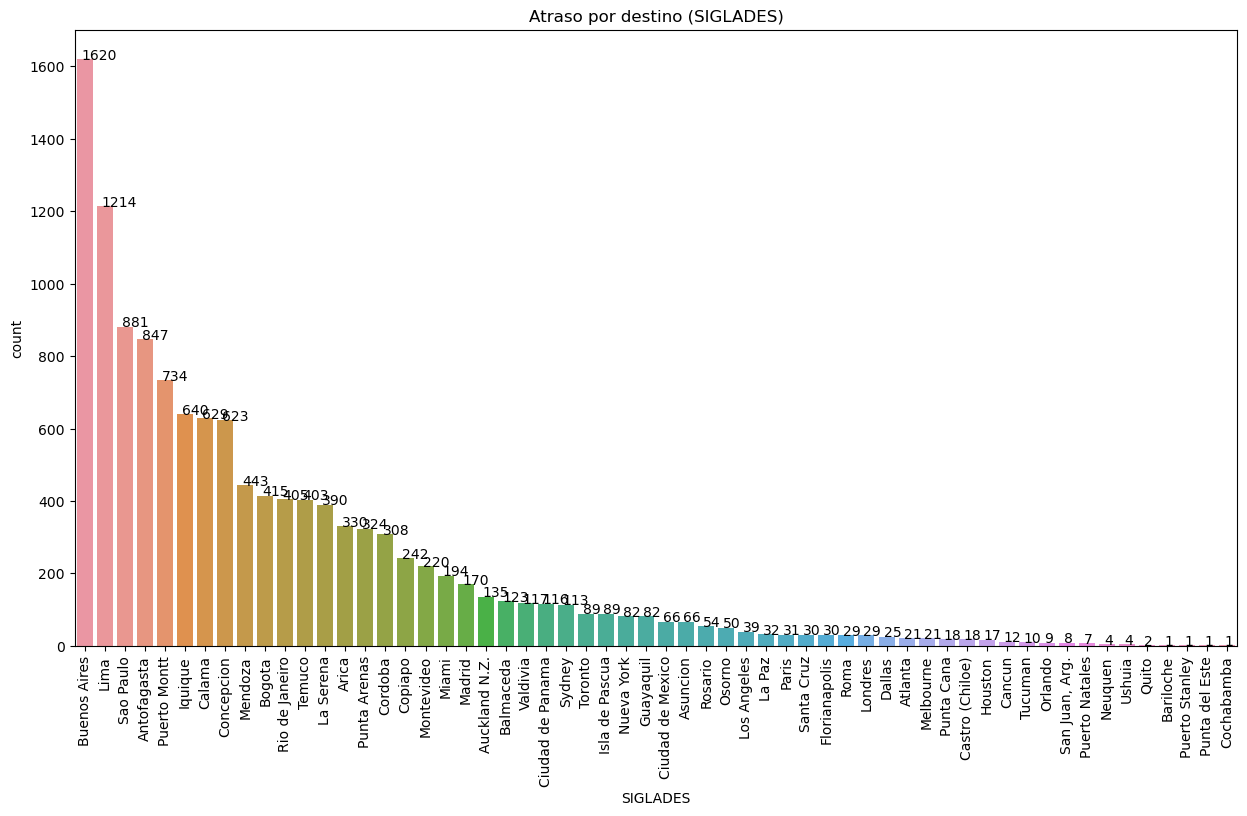

In [38]:
# atraso_15 : Atraso por destino.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='SIGLADES', data=df_atraso_15, 
                   order = df_atraso_15['SIGLADES'].value_counts().index)
plt.title("Atraso por destino (SIGLADES)")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#### Atraso por Aerolinea

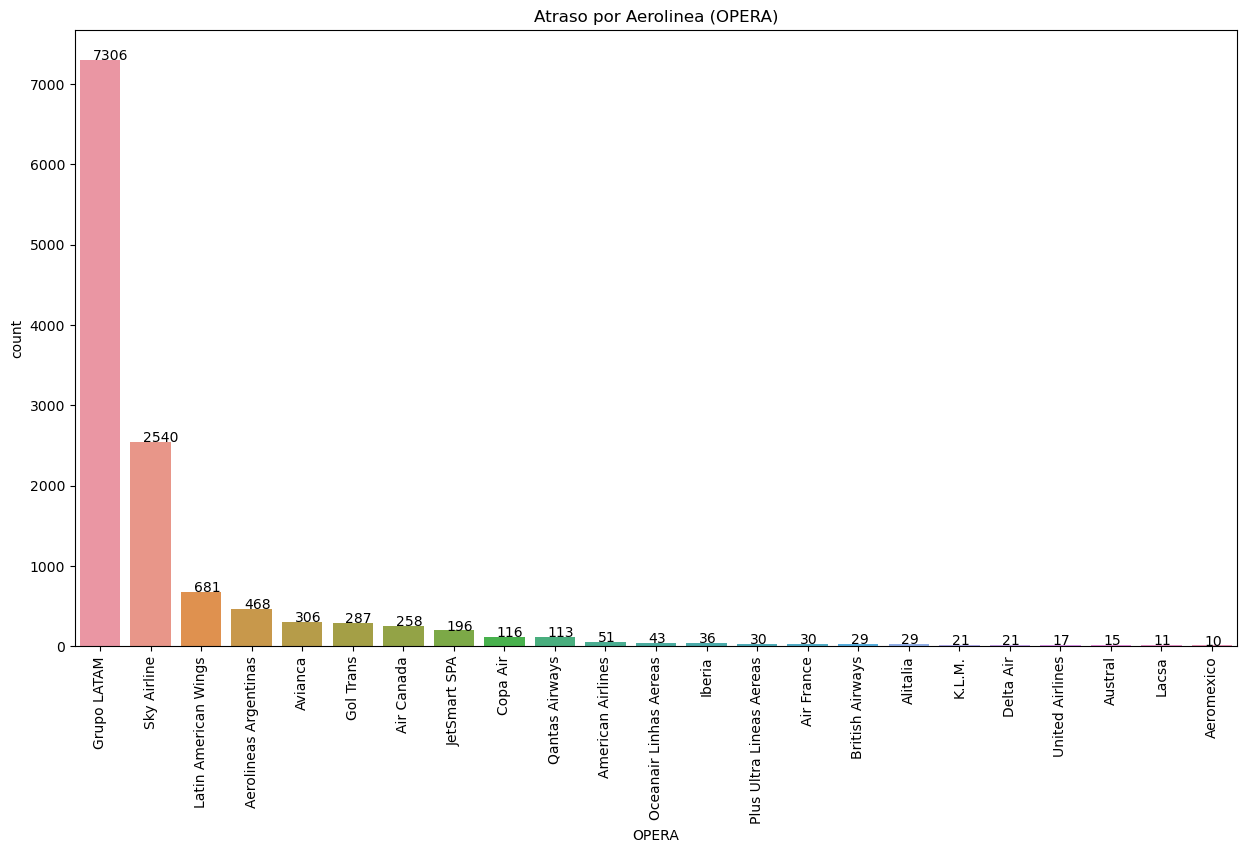

In [39]:
# atraso_15 : Atraso por Aerolinea.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='OPERA', data=df_atraso_15, 
                   order = df_atraso_15['OPERA'].value_counts().index)
plt.title("Atraso por Aerolinea (OPERA)")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#### Atraso por Mes del Año

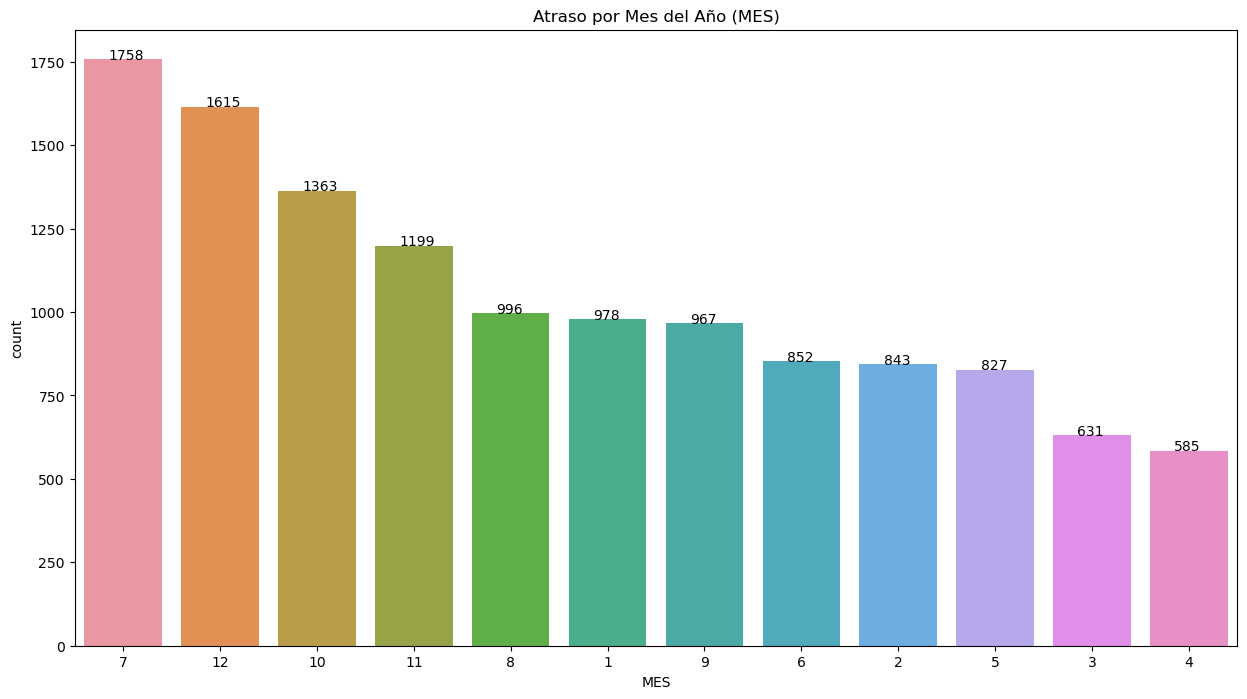

In [40]:
# atraso_15 : Atraso por Mes del Año.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='MES', data=df_atraso_15, 
                   order = df_atraso_15['MES'].value_counts().index)
plt.title("Atraso por Mes del Año (MES)")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#### Atraso por Día de Semana

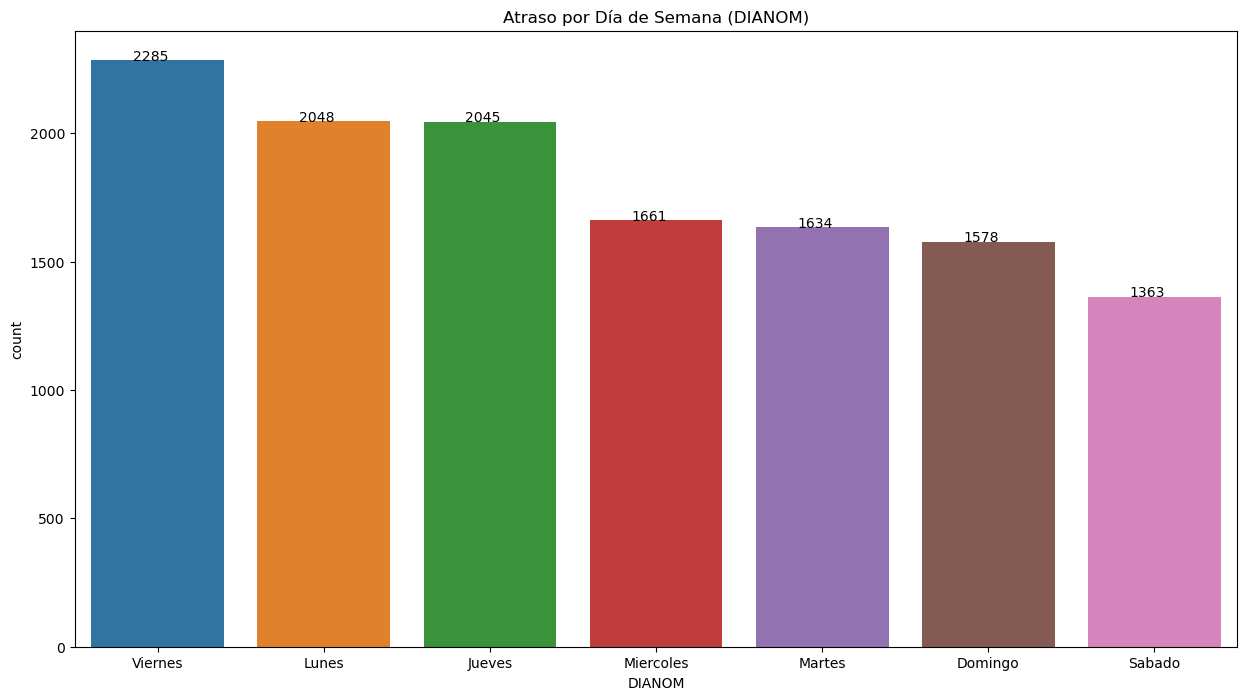

In [41]:
# atraso_15 : Atraso por Día de Semana.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='DIANOM', data=df_atraso_15, 
                   order = df_atraso_15['DIANOM'].value_counts().index)
plt.title("Atraso por Día de Semana (DIANOM)")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#### Atraso por Temporada

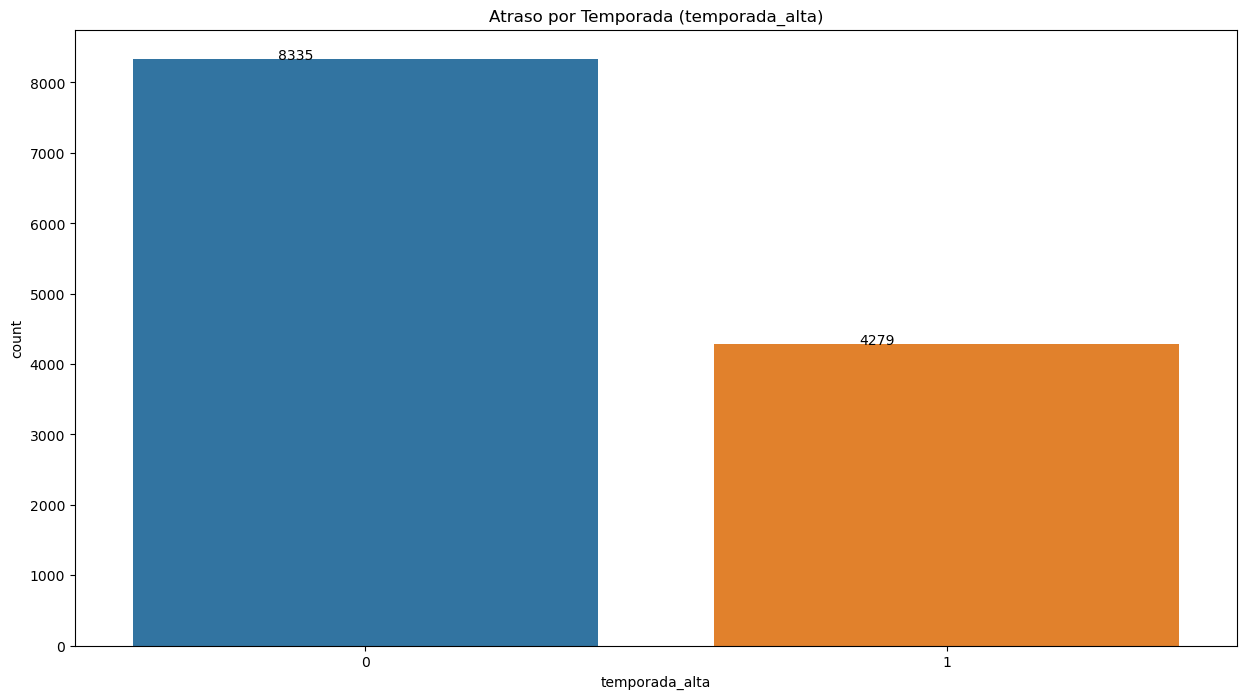

In [42]:
# atraso_15 : Atraso por Temporada.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='temporada_alta', data=df_atraso_15, 
                   order = df_atraso_15['temporada_alta'].value_counts().index)
plt.title("Atraso por Temporada (temporada_alta)")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#### Atraso por Tipo de Vuelo

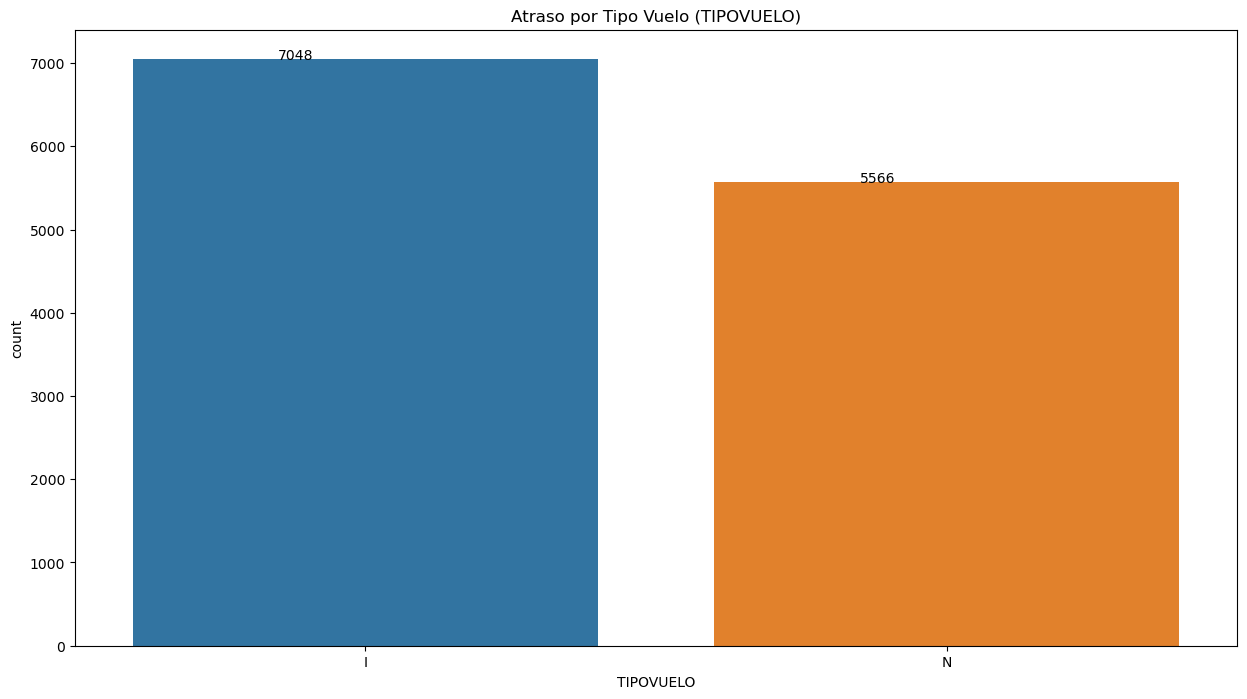

In [43]:
# atraso_15 : Atraso por Tipo de Vuelo.

plt.figure(figsize=(15,8))
ax = sns.countplot(x='TIPOVUELO', data=df_atraso_15, 
                   order = df_atraso_15['TIPOVUELO'].value_counts().index)
plt.title("Atraso por Tipo Vuelo (TIPOVUELO)")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

### 3.2. ¿Qué variables esperarías que más influyeran en predecir atrasos?

Considero que existen 2 variables que pueden influir en la predicción de atrasos:

 * Cambio de Destino (Des-I programado vs Des-O operación)
 * Cambio de Aerolinea (Emp-I programado vs Emp-O operación)

In [44]:
df['cambio_Des'] = 0
df['cambio_Emp'] = 0

In [45]:
for index, row in df.iterrows():
    if (row['Des-I'] != row['Des-O']):
        df.loc[index, 'cambio_Des'] = 1
    
    if (row['Emp-I'] != row['Emp-O']):
        df.loc[index, 'cambio_Emp'] = 1
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,cambio_Des,cambio_Emp
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,3.0,0,noche,0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,9.0,0,noche,0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,9.0,0,noche,0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,3.0,0,noche,0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,-2.0,0,noche,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde,0,0
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde,0,0
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde,0,0
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde,0,0


In [46]:
df[df['cambio_Des'] == 1].head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,cambio_Des,cambio_Emp
1397,2017-01-17 19:20:00,25,SCEL,SCTE,SKU,2017-01-17 19:46:00,25,SCEL,SCQP,SKU,...,N,Sky Airline,Santiago,Temuco,1,26.0,1,noche,1,0
7290,2017-02-15 06:25:00,11,SCEL,SCTE,SKU,2017-02-15 06:25:00,11,SCEL,SCQP,SKU,...,N,Sky Airline,Santiago,Temuco,1,0.0,0,mañana,1,0
7520,2017-02-27 06:40:00,71,SCEL,SCIE,SKU,2017-02-27 09:07:00,71,SCEL,SCQP,SKU,...,N,Sky Airline,Santiago,Temuco,1,147.0,1,mañana,1,0
8456,2017-02-15 06:10:00,57,SCEL,SCTE,LAN,2017-02-15 06:12:00,57,SCEL,SCQP,LAN,...,N,Grupo LATAM,Santiago,Temuco,1,2.0,0,mañana,1,0
12787,2017-03-18 06:25:00,11,SCEL,SCTE,SKU,2017-03-18 06:29:00,11,SCEL,SCQP,SKU,...,N,Sky Airline,Santiago,Temuco,0,4.0,0,mañana,1,0


In [47]:
df[df['cambio_Emp'] == 1].head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,cambio_Des,cambio_Emp
345,2017-01-21 22:30:00,2291,SCEL,SABE,AUT,2017-01-21 22:28:00,2291,SCEL,SABE,ARG,...,I,Austral,Santiago,Buenos Aires,1,-2.0,0,noche,0,1
814,2017-01-01 07:14:00,624,SCEL,SPJC,AVA,2017-01-01 07:11:00,624,SCEL,SPJC,LRC,...,I,Avianca,Santiago,Lima,1,-3.0,0,mañana,0,1
815,2017-01-02 07:00:00,624,SCEL,SPJC,AVA,2017-01-02 07:05:00,624,SCEL,SPJC,LRC,...,I,Avianca,Santiago,Lima,1,5.0,0,mañana,0,1
816,2017-01-03 07:14:00,624,SCEL,SPJC,AVA,2017-01-03 07:14:00,624,SCEL,SPJC,LRC,...,I,Avianca,Santiago,Lima,1,0.0,0,mañana,0,1
817,2017-01-04 07:00:00,624,SCEL,SPJC,AVA,2017-01-04 07:24:00,624,SCEL,SPJC,LRC,...,I,Avianca,Santiago,Lima,1,24.0,1,mañana,0,1


-------------------------

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. <a id="p4"></a>

### Siéntete libre de generar variables adicionales y/o complementar con variables externas.

Se entrenarán los siguientes modelos de clasificación para determinar la probabilidad de atraso de los vuelos:

* Nearest Neighbors
* Linear SVM
* Decision Tree
* Random Forest
* Neural Net
* AdaBoost
* Naive Bayes
* QDA

Asimismo, se generaron las variables adicionales:

 * Cambio de Destino (Des-I programado vs Des-O operación)
 * Cambio de Aerolinea (Emp-I programado vs Emp-O operación)

In [48]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [49]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia', 'cambio_Des', 'cambio_Emp'],
      dtype='object')

In [50]:
filter_vars = ['Des-I', 'Emp-I', 'Des-O', 'Emp-O', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
            'temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia', 'cambio_Des', 'cambio_Emp']
filter_vars

['Des-I',
 'Emp-I',
 'Des-O',
 'Emp-O',
 'MES',
 'AÑO',
 'DIANOM',
 'TIPOVUELO',
 'temporada_alta',
 'dif_min',
 'atraso_15',
 'periodo_dia',
 'cambio_Des',
 'cambio_Emp']

In [51]:
df_ml = df[filter_vars]
df_ml

,Des-I,Emp-I,Des-O,Emp-O,MES,AÑO,DIANOM,TIPOVUELO,temporada_alta,dif_min,atraso_15,periodo_dia,cambio_Des,cambio_Emp
0,KMIA,AAL,KMIA,AAL,1,2017,Domingo,I,1,3.0,0,noche,0,0
1,KMIA,AAL,KMIA,AAL,1,2017,Lunes,I,1,9.0,0,noche,0,0
2,KMIA,AAL,KMIA,AAL,1,2017,Martes,I,1,9.0,0,noche,0,0
3,KMIA,AAL,KMIA,AAL,1,2017,Miercoles,I,1,3.0,0,noche,0,0
4,KMIA,AAL,KMIA,AAL,1,2017,Jueves,I,1,-2.0,0,noche,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,SPJC,JAT,SPJC,JAT,12,2017,Viernes,I,1,46.0,1,tarde,0,0
68202,SPJC,JAT,SPJC,JAT,12,2017,Lunes,I,1,16.0,1,tarde,0,0
68203,SPJC,JAT,SPJC,JAT,12,2017,Miercoles,I,1,40.0,1,tarde,0,0
68204,SPJC,JAT,SPJC,JAT,12,2017,Viernes,I,1,13.0,0,tarde,0,0


In [52]:
df_ml_encode = df_ml.copy()
df_ml_encode

,Des-I,Emp-I,Des-O,Emp-O,MES,AÑO,DIANOM,TIPOVUELO,temporada_alta,dif_min,atraso_15,periodo_dia,cambio_Des,cambio_Emp
0,KMIA,AAL,KMIA,AAL,1,2017,Domingo,I,1,3.0,0,noche,0,0
1,KMIA,AAL,KMIA,AAL,1,2017,Lunes,I,1,9.0,0,noche,0,0
2,KMIA,AAL,KMIA,AAL,1,2017,Martes,I,1,9.0,0,noche,0,0
3,KMIA,AAL,KMIA,AAL,1,2017,Miercoles,I,1,3.0,0,noche,0,0
4,KMIA,AAL,KMIA,AAL,1,2017,Jueves,I,1,-2.0,0,noche,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,SPJC,JAT,SPJC,JAT,12,2017,Viernes,I,1,46.0,1,tarde,0,0
68202,SPJC,JAT,SPJC,JAT,12,2017,Lunes,I,1,16.0,1,tarde,0,0
68203,SPJC,JAT,SPJC,JAT,12,2017,Miercoles,I,1,40.0,1,tarde,0,0
68204,SPJC,JAT,SPJC,JAT,12,2017,Viernes,I,1,13.0,0,tarde,0,0


In [53]:
label_encoder = preprocessing.LabelEncoder()

df_ml_encode['Des-I']= label_encoder.fit_transform(df_ml_encode['Des-I'])
df_ml_encode['Emp-I']= label_encoder.fit_transform(df_ml_encode['Emp-I'])
df_ml_encode['Des-O']= label_encoder.fit_transform(df_ml_encode['Des-O'])
df_ml_encode['Emp-O']= label_encoder.fit_transform(df_ml_encode['Emp-O'])
df_ml_encode['DIANOM']= label_encoder.fit_transform(df_ml_encode['DIANOM'])
df_ml_encode['TIPOVUELO']= label_encoder.fit_transform(df_ml_encode['TIPOVUELO'])
df_ml_encode['dif_min']= df_ml_encode['dif_min'].astype(int)
df_ml_encode['periodo_dia']= label_encoder.fit_transform(df_ml_encode['periodo_dia'])

In [54]:
df_ml_encode

,Des-I,Emp-I,Des-O,Emp-O,MES,AÑO,DIANOM,TIPOVUELO,temporada_alta,dif_min,atraso_15,periodo_dia,cambio_Des,cambio_Emp
0,9,0,10,2,1,2017,0,0,1,3,0,1,0,0
1,9,0,10,2,1,2017,2,0,1,9,0,1,0,0
2,9,0,10,2,1,2017,3,0,1,9,0,1,0,0
3,9,0,10,2,1,2017,4,0,1,3,0,1,0,0
4,9,0,10,2,1,2017,1,0,1,-2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,58,14,57,16,12,2017,6,0,1,46,1,2,0,0
68202,58,14,57,16,12,2017,2,0,1,16,1,2,0,0
68203,58,14,57,16,12,2017,4,0,1,40,1,2,0,0
68204,58,14,57,16,12,2017,6,0,1,13,0,2,0,0


In [55]:
df_ml_encode.dtypes

Des-I             int32
Emp-I             int32
Des-O             int32
Emp-O             int32
MES               int32
AÑO               int32
DIANOM            int32
TIPOVUELO         int32
temporada_alta    int64
dif_min           int32
atraso_15         int64
periodo_dia       int32
cambio_Des        int64
cambio_Emp        int64
dtype: object

#### Selección de características:

In [56]:
df_ml_encode.columns

Index(['Des-I', 'Emp-I', 'Des-O', 'Emp-O', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia', 'cambio_Des',
       'cambio_Emp'],
      dtype='object')

In [57]:
feature_cols = ['Des-I', 'Emp-I', 'Des-O', 'Emp-O', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 
                'temporada_alta', 'dif_min', 'periodo_dia', 'cambio_Des', 'cambio_Emp']
X = df_ml_encode[feature_cols] # Características
y = df_ml_encode['atraso_15'] # Variable objetivo

In [58]:
X

,Des-I,Emp-I,Des-O,Emp-O,MES,AÑO,DIANOM,TIPOVUELO,temporada_alta,dif_min,periodo_dia,cambio_Des,cambio_Emp
0,9,0,10,2,1,2017,0,0,1,3,1,0,0
1,9,0,10,2,1,2017,2,0,1,9,1,0,0
2,9,0,10,2,1,2017,3,0,1,9,1,0,0
3,9,0,10,2,1,2017,4,0,1,3,1,0,0
4,9,0,10,2,1,2017,1,0,1,-2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,58,14,57,16,12,2017,6,0,1,46,2,0,0
68202,58,14,57,16,12,2017,2,0,1,16,2,0,0
68203,58,14,57,16,12,2017,4,0,1,40,2,0,0
68204,58,14,57,16,12,2017,6,0,1,13,2,0,0


In [59]:
y

0        0
1        0
2        0
3        0
4        0
        ..
68201    1
68202    1
68203    1
68204    0
68205    0
Name: atraso_15, Length: 68206, dtype: int64

#### División de datos

In [60]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [61]:
X_test

,Des-I,Emp-I,Des-O,Emp-O,MES,AÑO,DIANOM,TIPOVUELO,temporada_alta,dif_min,periodo_dia,cambio_Des,cambio_Emp
47259,41,17,41,24,9,2017,0,1,0,4,1,0,1
53766,37,17,37,24,10,2017,2,1,0,13,0,0,1
35939,49,17,49,24,7,2017,6,1,0,15,2,0,1
59250,48,17,48,24,11,2017,3,1,0,8,0,0,1
23191,33,28,33,29,5,2017,5,0,0,-3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63962,39,27,39,28,12,2017,3,1,1,45,0,0,0
18245,48,27,48,28,4,2017,5,1,0,-8,0,0,0
32779,54,6,53,8,7,2017,2,0,0,-4,0,0,0
60425,21,17,22,19,11,2017,4,0,0,23,1,0,0


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [63]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    #"RBF SVM",
    #"Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [64]:
classifiers = [
    KNeighborsClassifier(n_neighbors=3, metric='minkowski'),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [65]:
df_classifiers = pd.DataFrame({
    'classifier': pd.Series(dtype='str'),
    'score': pd.Series(dtype='float')})

In [66]:
# iterate over classifiers
print("------------------------------------")

for name, clf in zip(names, classifiers):

    print("classifier : ", name)
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)    
    print(clf)
    print("score : ", score)
    print("------------------------------------")
    df_classifiers.loc[len(df_classifiers.index)] = [name, score]

------------------------------------
classifier :  Nearest Neighbors
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])
score :  0.9635910468184928
------------------------------------
classifier :  Linear SVM
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.025, kernel='linear'))])
score :  0.9920340142703548
------------------------------------
classifier :  Decision Tree
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5))])
score :  1.0
------------------------------------
classifier :  Random Forest
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10))])
score :  0.8282181604926204
------------------

### 5. Evalúa tu modelo: <a id="p5"></a>

#### 5.1 ¿Qué performance tiene?


A continuación se muestra el score obtenido por cada modelo de clasificación:

In [67]:
df_classifiers = df_classifiers.sort_values('score', ascending=False)
df_classifiers

,classifier,score
2,Decision Tree,1.000000
5,AdaBoost,1.000000
1,Linear SVM,0.992034
4,Neural Net,0.989981
0,Nearest Neighbors,0.963591
6,Naive Bayes,0.955772
7,QDA,0.933486
3,Random Forest,0.828218


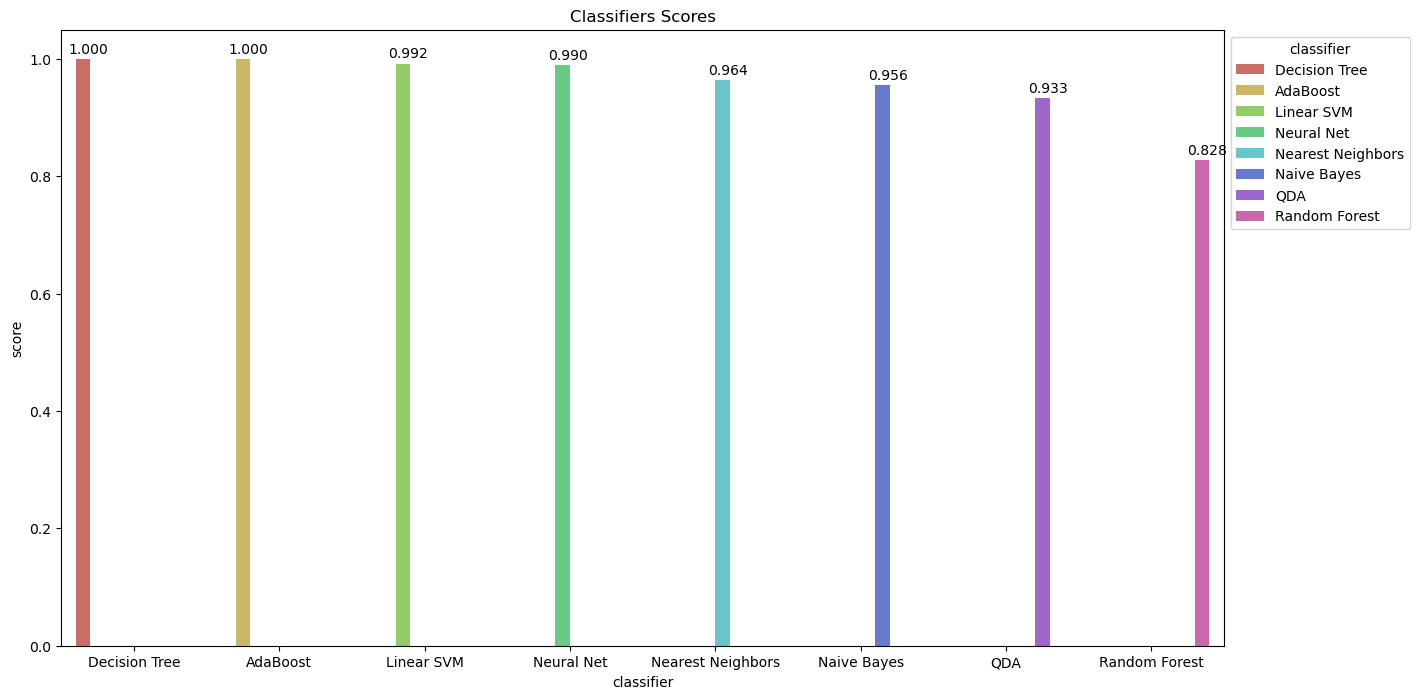

In [68]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="classifier", y="score", hue='classifier', data=df_classifiers, palette="hls")


plt.title("Classifiers Scores")

for p in ax.patches:
   ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x()-0.05, p.get_height()+0.01))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### 5.2. ¿Qué métricas usaste para evaluar esa performance y por qué?


Usaremos las principales métricas para los modelos de clasificación:
    
* R cuadrado
* MSE
* RMSE
* Precision
* Recall
* F1-score
* Support

#### 5.3. ¿Por qué elegiste ese algoritmo en particular?

He usado 8 algoritmos para poder comparar el score entre ellos:
1. Nearest Neighbors
2. Linear SVM
3. Decision Tree
4. Random Forest
5. Neural Net
6. AdaBoost
7. Naive Bayes
8. QDA

#### DecisionTreeClassifier: Score = 1.0

In [69]:
# Create Decision Tree classifier object
clf_dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf_dt = clf_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Precisión:", metrics.accuracy_score(y_test, y_pred))
score_dt = r2_score(y_test, y_pred)
print("El valor de R al cuadrado es ", score_dt)
print("El MSE es=", mean_squared_error(y_test,y_pred))
print("El valor RMSE es=", np.sqrt(mean_squared_error(y_test,y_pred)))

report=classification_report(y_test,y_pred)
print(report)
mat_dt=confusion_matrix(y_test, y_pred)
print(mat_dt)

Precisión: 1.0
El valor de R al cuadrado es  1.0
El MSE es= 0.0
El valor RMSE es= 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16661
           1       1.00      1.00      1.00      3801

    accuracy                           1.00     20462
   macro avg       1.00      1.00      1.00     20462
weighted avg       1.00      1.00      1.00     20462

[[16661     0]
 [    0  3801]]


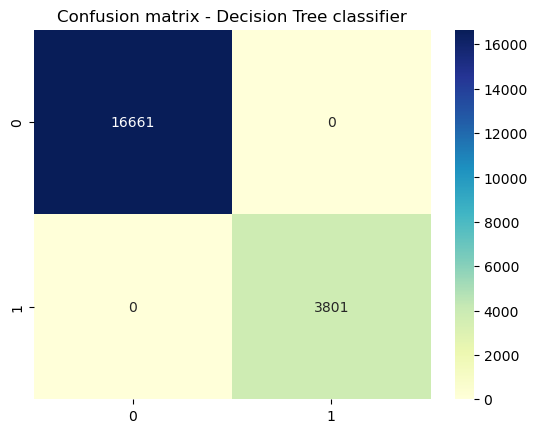

In [70]:
ax = plt.axes()
sns.heatmap(mat_dt, annot=True, cmap="YlGnBu", fmt='g', ax = ax)
ax.set_title('Confusion matrix - Decision Tree classifier')
plt.show()

In [71]:
class_names = ['Con atraso', 'Sin atraso']

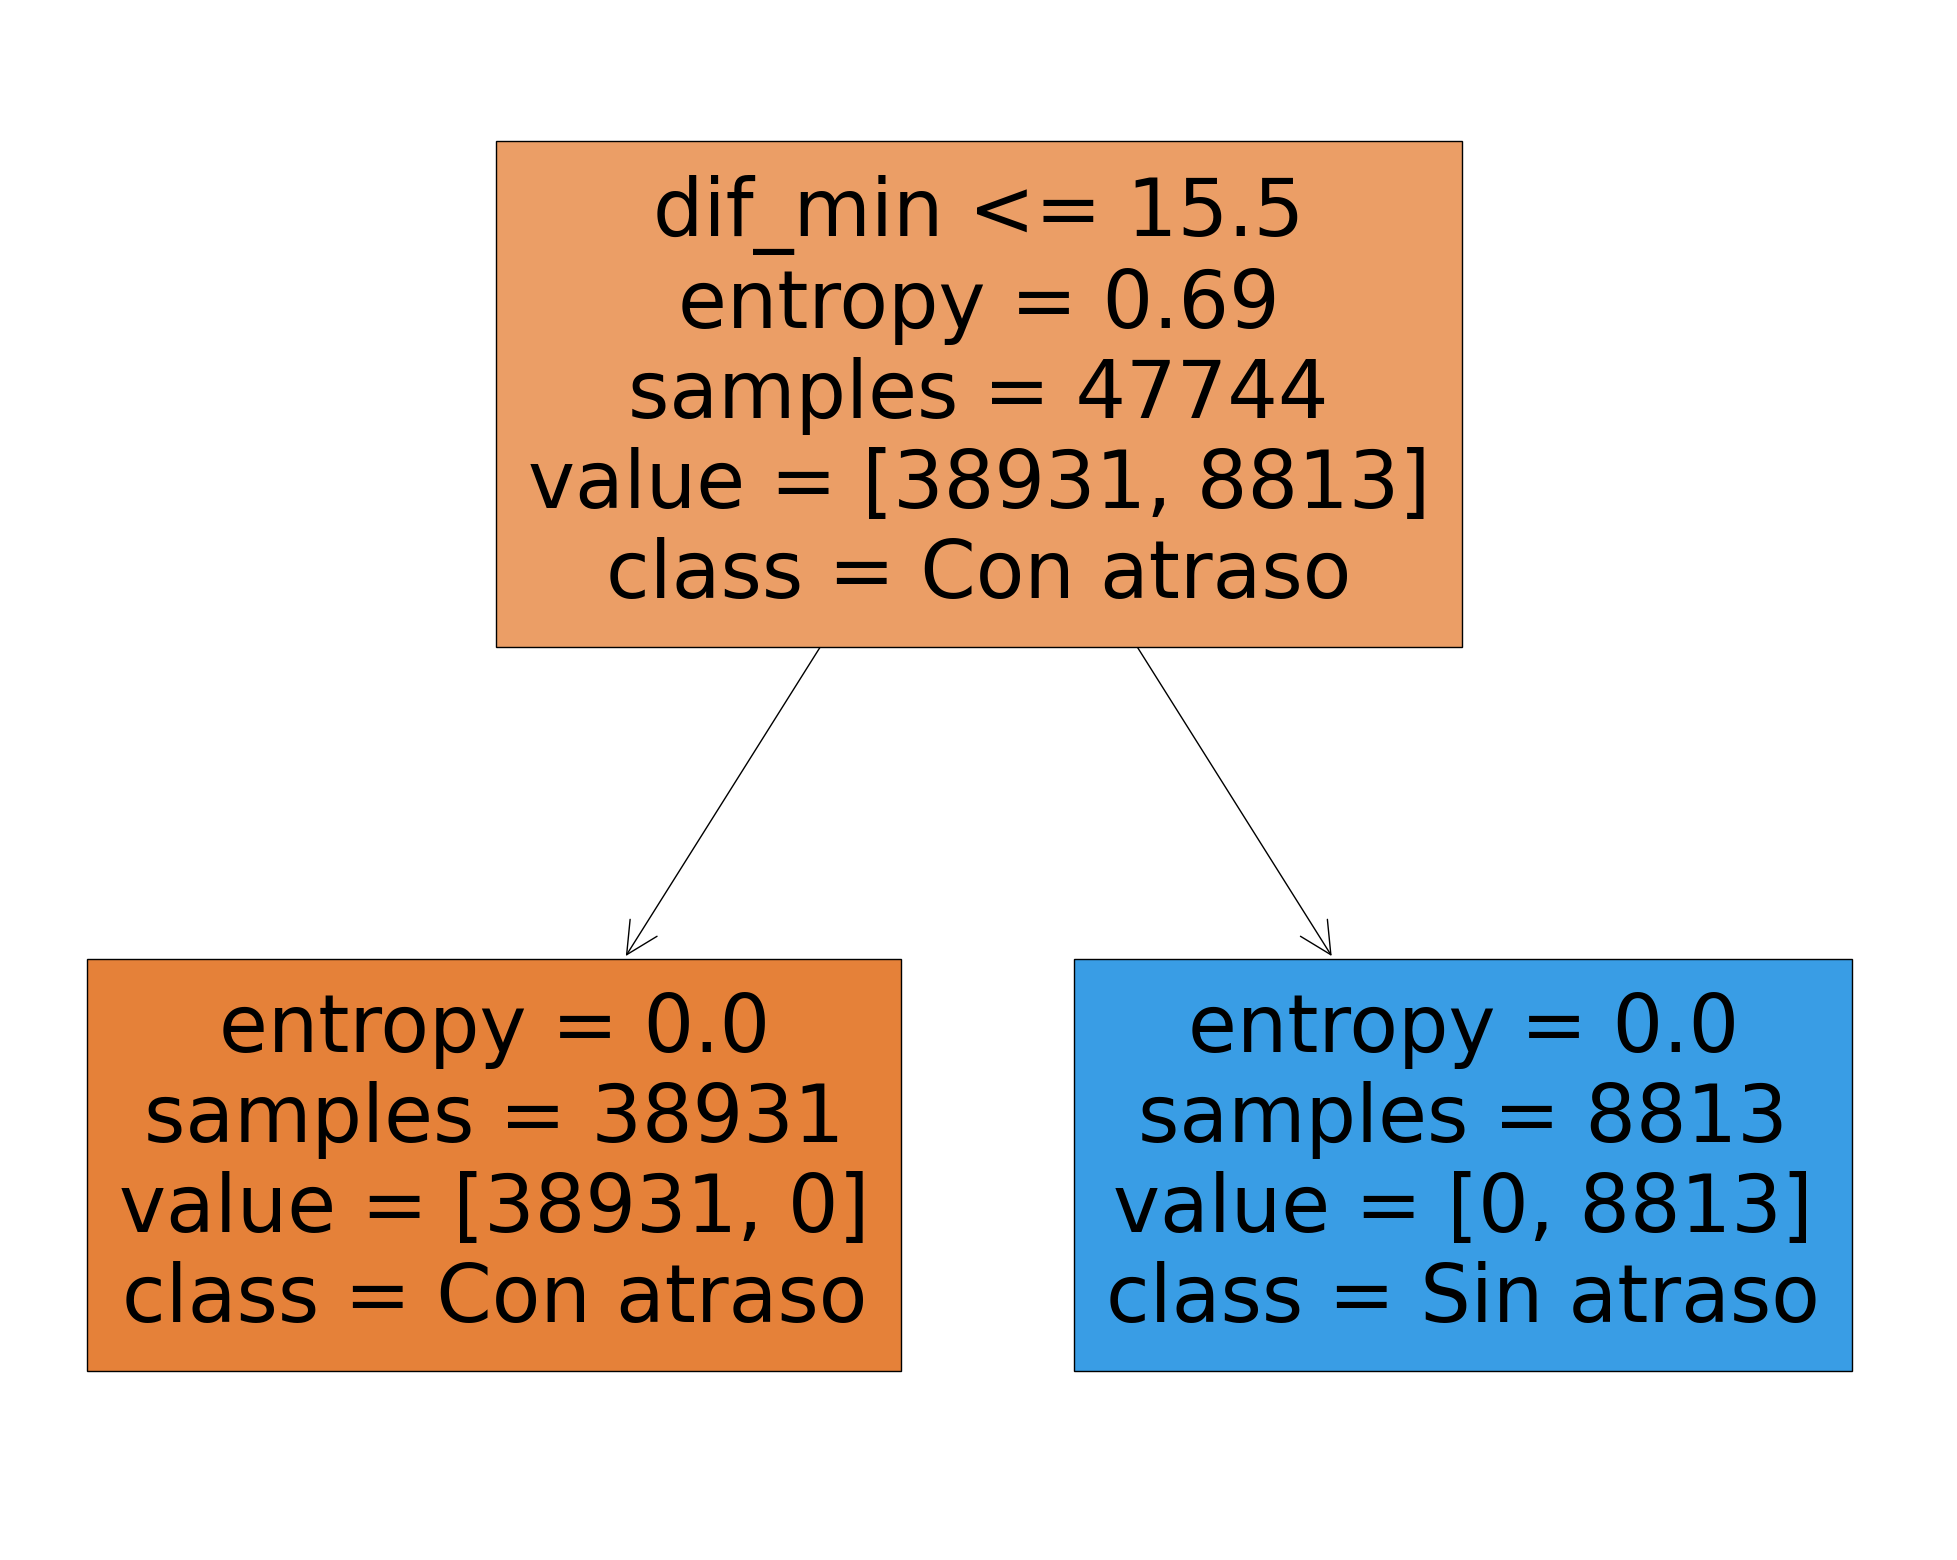

In [72]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf_dt, filled=True, feature_names=feature_cols, class_names=class_names)
plt.show()

#### AdaBoost: Score = 1.0

In [73]:
# Create AdaBoostClassifier object
clf_ab = AdaBoostClassifier()

# Train AdaBoostClassifier
clf_ab = clf_ab.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_ab.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Precisión:", metrics.accuracy_score(y_test, y_pred))
score_ab = r2_score(y_test, y_pred)
print("El valor de R al cuadrado es ", score_ab)
print("El MSE es=", mean_squared_error(y_test,y_pred))
print("El valor RMSE es=", np.sqrt(mean_squared_error(y_test,y_pred)))

report_ab=classification_report(y_test,y_pred)
print(report_ab)
mat_ab=confusion_matrix(y_test, y_pred)
print(mat_ab)

Precisión: 1.0
El valor de R al cuadrado es  1.0
El MSE es= 0.0
El valor RMSE es= 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16661
           1       1.00      1.00      1.00      3801

    accuracy                           1.00     20462
   macro avg       1.00      1.00      1.00     20462
weighted avg       1.00      1.00      1.00     20462

[[16661     0]
 [    0  3801]]


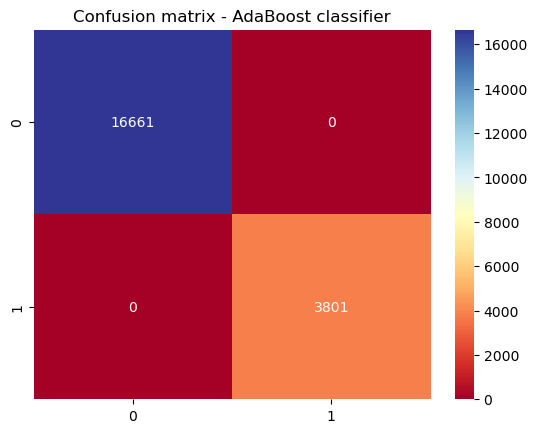

In [74]:
ax = plt.axes()
sns.heatmap(mat_ab, annot=True, cmap="RdYlBu", fmt='g', ax = ax)
ax.set_title('Confusion matrix - AdaBoost classifier')
plt.show()

#### Linear SVM: Score = 0.9920340142703548

In [75]:
# Create Linear SVM Classifier object
clf_lsvm = SVC(kernel="linear", C=0.025)

# Train Linear SVM Classifier
clf_lsvm = clf_lsvm.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_lsvm.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Precisión:", metrics.accuracy_score(y_test, y_pred))
score_lsvm = r2_score(y_test, y_pred)
print("El valor de R al cuadrado es ", score_lsvm)
print("El MSE es=", mean_squared_error(y_test,y_pred))
print("El valor RMSE es=", np.sqrt(mean_squared_error(y_test,y_pred)))

report_lsvm=classification_report(y_test,y_pred)
print(report_lsvm)
mat_lsvm=confusion_matrix(y_test, y_pred)
print(mat_lsvm)

Precisión: 1.0
El valor de R al cuadrado es  1.0
El MSE es= 0.0
El valor RMSE es= 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16661
           1       1.00      1.00      1.00      3801

    accuracy                           1.00     20462
   macro avg       1.00      1.00      1.00     20462
weighted avg       1.00      1.00      1.00     20462

[[16661     0]
 [    0  3801]]


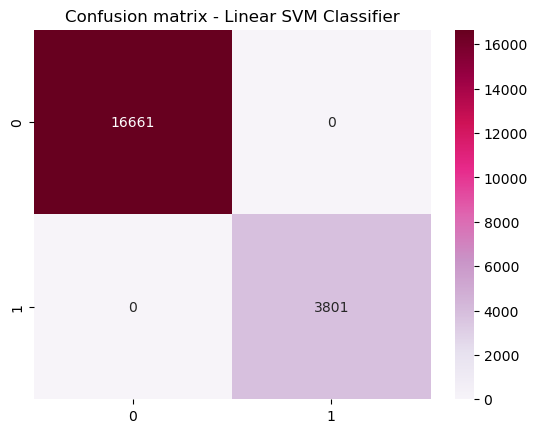

In [76]:
ax = plt.axes()
sns.heatmap(mat_lsvm, annot=True, cmap="PuRd", fmt='g', ax = ax)
ax.set_title('Confusion matrix - Linear SVM Classifier')
plt.show()

#### 5.4. ¿Qué variables son las que más influyen en la predicción?


No existen correlaciones individuales entre variables features y la variable target. Sin emabrgo, en los modelos de clasificación han conseguido scores superiores al 90%.
    

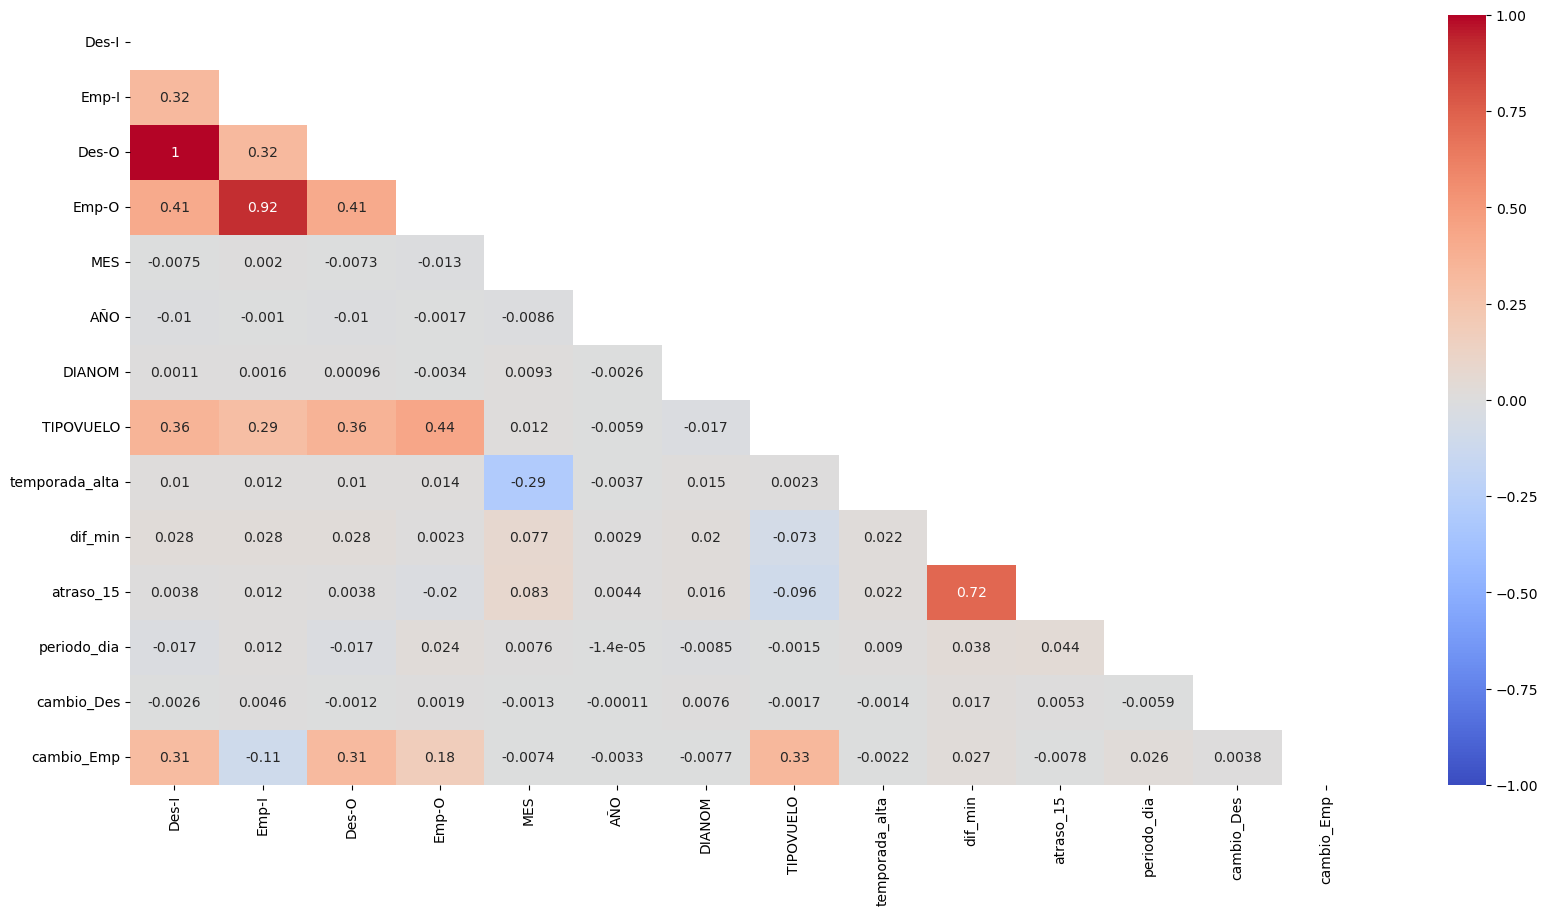

In [77]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        mask = np.triu(np.ones_like(dataframe.corr()))
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    mask=mask,
                    cmap='coolwarm',
                    vmin = -1,
                    vmax = 1,
                    annot=True)
    return corr

correlation_df = show_correlations(df_ml_encode,show_chart=True)

#### 5.5. ¿Cómo podrías mejorar la performance?

Suegiero ir cambiando los parámetros de los Clasificadores para evidenciar mejoras en los scores de los modelos:

* KNeighborsClassifier(n_neighbors=3, metric='minkowski')
* SVC(kernel="linear", C=0.025)
* DecisionTreeClassifier(max_depth=5)
* RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
* MLPClassifier(alpha=1, max_iter=1000)
* AdaBoostClassifier()
* GaussianNB()
* QuadraticDiscriminantAnalysis()

----------------------------------